# Import Libraries

In [1]:
#Required Libraries Input
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from termcolor import colored

# Data Calling

In [2]:
#Data Input from same directory
normal = pd.read_csv("1NormalWave.csv", encoding='cp949')
fuzz = pd.read_csv("21FuzzWave.csv", encoding='cp949')
dos = pd.read_csv("3DoSWave.csv", encoding='cp949')
replay = pd.read_csv("4ReplayWave.csv", encoding='cp949')

In [3]:
print("Normal: ", len(normal))
print("Fuzz: ", len(fuzz))
print("DoS: ", len(dos))
print("Replay: ", len(replay))

Normal:  230092
Fuzz:  234483
DoS:  185425
Replay:  50000


In [4]:
# Data Input from same different directory
Car_Data_Frame = pd.read_csv('C:/Users/Lisa/Rezanur/Car Id/tesla 2.trc', encoding='cp949')
Car_Data_Frame

,CAN_Data
0,1) 8.4 Rx 0118 8 57 0...
1,2) 8.6 Rx 0343 8 00 9...
2,3) 8.9 Rx 07D5 8 32 0...
3,4) 9.4 Rx 02C2 8 55 5...
4,5) 10.4 Rx 03C2 8 29 5...
...,...
248676,248677) 218185.6 Rx 0545 8 76 0...
248677,248678) 218186.3 Rx 04E2 8 00 8...
248678,248679) 218186.6 Rx 02E5 8 00 0...
248679,248680) 218186.8 Rx 01D8 8 21 0...


In [5]:
#Data call from online
Data = pd.read_csv("https://media.geeksforgeeks.org/wp-content/uploads/nba.csv", encoding='cp949')
Data

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0


In [6]:
#Data Cleaning
#Spliting time and payload
Car_Data_Frame = Car_Data_Frame['CAN_Data'].str.split('Rx         ',n=1,expand=True)
Car_Data_Frame = Car_Data_Frame.rename(columns={0:'Time', 1:'Payload'})

#Splitting Time
Car_Data_Frame_Time = Car_Data_Frame['Time'].str.split(')',n=2,expand=True)
Car_Data_Frame_Time = Car_Data_Frame_Time.rename(columns={0:'Serial', 1:'Time'})
Car_Data_Frame_Time = Car_Data_Frame_Time.Time.astype(float)
Car_Data_Frame_Time = pd.DataFrame(Car_Data_Frame_Time).rename(columns={0:'Time'})

#Splitting Payload
Car_Data_Frame_Time_ID = Car_Data_Frame['Payload'].str.split('  ',n=2,expand=True)
Car_Data_Frame_Time_ID = Car_Data_Frame_Time_ID.rename(columns={0:'CAN_ID', 1:'DLC', 2:'Payload_8_hex'})

#Splitting Payload with each PID
Car_Data_Frame_Time_Payload_hex = Car_Data_Frame_Time_ID['Payload_8_hex'].str.split(' ',n=7,expand=True)
Car_Data_Frame_Time_Payload_hex = Car_Data_Frame_Time_Payload_hex.rename(
    columns={0:'One', 1:'Two', 2:'Three', 3:'Four', 4:'Five', 5:'Six', 6:'Seven', 7:'Eight'})

#Joind all data set
Car_Data_Frame = pd.concat([pd.DataFrame(Car_Data_Frame_Time), pd.DataFrame(Car_Data_Frame_Time_ID), 
                            pd.DataFrame(Car_Data_Frame_Time_Payload_hex)], axis=1)
Car_Data_Frame = Car_Data_Frame.sort_values(['Time'], ignore_index = True)

#Time Gap Calculation (Full_Data_Time_Gap)
Time_gap = [0]
k4 = 1
lenth = len(Car_Data_Frame)-1

for k in Car_Data_Frame.Time:
    k2 = float(Car_Data_Frame.Time[k4]) - float(k)
    Time_gap.append(k2)
    if k4 >= lenth:
        break
    k4 = k4 + 1

#Joind with time gap
Car_Data_Frame = pd.concat([pd.DataFrame(Car_Data_Frame), pd.DataFrame(Time_gap)], axis=1)
Normal_Car_Data_Frame = Car_Data_Frame.rename(columns={0:'Full_Data_Time_Gap'})
print(colored('Total Amount of Data Normal: ', 'blue', attrs=['bold']),len(Car_Data_Frame))

Total Amount of Data Normal:  248681


In [7]:
Normal_Car_Data_Frame

,Time,CAN_ID,DLC,Payload_8_hex,One,Two,Three,Four,Five,Six,Seven,Eight,Full_Data_Time_Gap
0,8.4,0118,8,57 04 22 18 00 00 00 00,57,04,22,18,00,00,00,00,0.0
1,8.6,0343,8,00 90 68 BE 96 00 00 00,00,90,68,BE,96,00,00,00,0.2
2,8.9,07D5,8,32 0E 04 00 00 00 00 00,32,0E,04,00,00,00,00,00,0.3
3,9.4,02C2,8,55 5B A9 B6 02 00 92 00,55,5B,A9,B6,02,00,92,00,0.5
4,10.4,03C2,8,29 55 00 00 00 00 00 00,29,55,00,00,00,00,00,00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
248676,218185.6,0545,8,76 00 53 E0 98 95 C9 E9,76,00,53,E0,98,95,C9,E9,0.2
248677,218186.3,04E2,8,00 8C 02 00 00 00 08 00,00,8C,02,00,00,00,08,00,0.7
248678,218186.6,02E5,8,00 00 03 0D 00 00 DD 00,00,00,03,0D,00,00,DD,00,0.3
248679,218186.8,01D8,8,21 00 00 00 00 00 40 3A,21,00,00,00,00,00,40,3A,0.2


In [8]:
list(Normal_Car_Data_Frame.columns)

['Time',
 'CAN_ID',
 'DLC',
 'Payload_8_hex',
 'One',
 'Two',
 'Three',
 'Four',
 'Five',
 'Six',
 'Seven',
 'Eight',
 'Full_Data_Time_Gap']

In [9]:
categorical_data = Normal_Car_Data_Frame[['One','Two','Three', 'Four', 
                                          'Five', 'Six', 'Seven', 'Eight']] #Selecting the columns
categorical_data

,One,Two,Three,Four,Five,Six,Seven,Eight
0,57,04,22,18,00,00,00,00
1,00,90,68,BE,96,00,00,00
2,32,0E,04,00,00,00,00,00
3,55,5B,A9,B6,02,00,92,00
4,29,55,00,00,00,00,00,00
...,...,...,...,...,...,...,...,...
248676,76,00,53,E0,98,95,C9,E9
248677,00,8C,02,00,00,00,08,00
248678,00,00,03,0D,00,00,DD,00
248679,21,00,00,00,00,00,40,3A


# Data Joining

In [10]:
#Data joining
Final = pd.concat([pd.DataFrame(normal), pd.DataFrame(fuzz),
                        pd.DataFrame(dos), pd.DataFrame(replay)], 
                        ignore_index=True ) #Join data in x axis

print('Full Data Shape :', Final.shape)
Final

Full Data Shape : (700000, 12)


,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,Col_10,Label
0,238.50000,300.50000,36.999996,-201.500000,72.500000,0.000000,-7.778174,-50.911682,98.287840,82.024380,7.778174,0
1,109.49999,185.50000,97.499990,65.499990,151.500000,-77.499990,-123.743680,-25.455845,112.429970,21.213203,14.142136,0
2,320.00000,300.50000,169.999980,-57.000015,72.500000,-92.999985,-111.015760,38.890870,98.287840,82.024380,-20.506096,0
3,217.50000,300.50000,95.500000,-95.500000,72.500000,-26.500000,-22.627415,-139.300030,98.287840,82.024380,-14.849243,0
4,388.50000,300.50000,171.500000,-110.500000,72.500000,-106.500000,-138.592930,-9.192383,98.287840,82.024380,-12.020815,0
...,...,...,...,...,...,...,...,...,...,...,...,...
699995,288.00000,248.49998,165.999980,-25.000015,60.499985,-96.999985,-111.015760,41.719307,139.300030,67.882250,-26.162949,3
699996,280.50000,248.49998,166.499980,-16.500015,60.499985,-97.499985,-111.722870,54.447227,139.300030,67.882250,-26.162949,3
699997,385.00000,248.49998,168.499980,-97.000015,60.499985,-119.499985,-156.977700,-21.213196,139.300030,67.882250,-12.020816,3
699998,349.50000,183.00000,139.500000,-90.500000,-4.000000,-119.500000,-177.483800,8.485291,48.790363,67.175140,8.485281,3


In [11]:
'''https://pandas.pydata.org/docs/reference/api/pandas.concat.html''' ### For Data join details

'https://pandas.pydata.org/docs/reference/api/pandas.concat.html'

In [12]:
pd.concat([pd.DataFrame(normal), pd.DataFrame(fuzz)], ignore_index=True, axis=1) #Join data in y axis

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,238.50000,300.5,36.999996,-201.500000,72.5,0.000000,-7.778174,-50.911682,98.28784,82.024380,...,627.500000,111.000015,-82.499985,2.500000,86.974150,68.589355,-96.873634,0.000000,-83.438614,1
1,109.49999,185.5,97.499990,65.499990,151.5,-77.499990,-123.743680,-25.455845,112.42997,21.213203,...,28.999998,-155.499980,-1.500008,-18.999998,-33.941124,-105.358910,36.769547,-74.246216,7.071068,1
2,320.00000,300.5,169.999980,-57.000015,72.5,-92.999985,-111.015760,38.890870,98.28784,82.024380,...,28.999998,-155.499980,-1.500008,-18.999998,-33.941124,-105.358910,36.769547,-74.246216,7.071068,1
3,217.50000,300.5,95.500000,-95.500000,72.5,-26.500000,-22.627415,-139.300030,98.28784,82.024380,...,28.999998,-155.499980,-1.500008,-18.999998,-33.941124,-105.358910,36.769547,-74.246216,7.071068,1
4,388.50000,300.5,171.500000,-110.500000,72.5,-106.500000,-138.592930,-9.192383,98.28784,82.024380,...,28.999998,-155.499980,-1.500008,-18.999998,-33.941124,-105.358910,36.769547,-74.246216,7.071068,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,537.500000,102.499970,19.500002,18.500030,91.216780,-117.379730,-71.417786,-36.769550,-65.053830,1
234479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,537.500000,102.499970,19.500002,18.500030,91.216780,-117.379730,-71.417786,-36.769550,-65.053830,1
234480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,537.500000,102.499970,19.500002,18.500030,91.216780,-117.379730,-71.417786,-36.769550,-65.053830,1
234481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,537.500000,102.499970,19.500002,18.500030,91.216780,-117.379730,-71.417786,-36.769550,-65.053830,1


In [13]:
print("Normal Data Length :", len(pd.DataFrame(normal)))
print("Fuzz Data Length :", len(pd.DataFrame(fuzz)))

Normal Data Length : 230092
Fuzz Data Length : 234483


In [14]:
#Convert Into Array [Personal Choise]
Final = np.array(Final)
Final

array([[238.5      , 300.5      ,  36.999996 , ...,  82.02438  ,
          7.7781744,   0.       ],
       [109.49999  , 185.5      ,  97.49999  , ...,  21.213203 ,
         14.142136 ,   0.       ],
       [320.       , 300.5      , 169.99998  , ...,  82.02438  ,
        -20.506096 ,   0.       ],
       ...,
       [385.       , 248.49998  , 168.49998  , ...,  67.88225  ,
        -12.020816 ,   3.       ],
       [349.5      , 183.       , 139.5      , ...,  67.17514  ,
          8.485281 ,   3.       ],
       [272.       ,  95.5      , 131.5      , ..., -18.384777 ,
          7.7781744,   3.       ]])

# Data Reshaping

In [15]:
#2D data
print("Final Data Shape :", Final.shape) #Full Shape and saying the dimention here is 2d
print("Final Data Number of Rows :", Final.shape[0]) #Dimension 1 representing data length
print("Final Data Number of Columns :", Final.shape[1]) #Dimension 2 representing number of data feature

Final Data Shape : (700000, 12)
Final Data Number of Rows : 700000
Final Data Number of Columns : 12


In [16]:
#Reshapeing Data into 3D
RearrangeData = Final.reshape(70,10000,12) #Reshaping Rule [10000*70=700000]
shuffle_idx = np.random.permutation(RearrangeData.shape[0]) #Shuffle parameter fixing
RearrangeData = RearrangeData[shuffle_idx] #Shuffling

In [17]:
#Home Work
array = np.array([[1,2,3,4,5,6,7,8]])
###Convert it into 2d,3d,4d?

In [18]:
#Return Into Same Shape 
print('Old:', RearrangeData.shape)
RearrangeData = RearrangeData.reshape(700000, 12)
print('Updated:',RearrangeData.shape)

Old: (70, 10000, 12)
Updated: (700000, 12)


# Data Scaling

In [19]:
#Data normalization by scalling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1)) #Scalling maximun value will 1 and minimum will -1
Final_DataFrame_scaled = scaler.fit_transform(RearrangeData) #Selecting input data set without label column
Final_DataFrame_scaled.shape

(700000, 12)

In [20]:
Final_DataFrame_scaled

array([[0.65860338, 0.43849209, 0.69367531, ..., 0.59045726, 0.29054843,
        0.33333333],
       [0.65860338, 0.43849209, 0.69367531, ..., 0.59045726, 0.29054843,
        0.33333333],
       [0.65860338, 0.43849209, 0.69367531, ..., 0.59045726, 0.29054843,
        0.33333333],
       ...,
       [0.18439069, 0.54563495, 0.09210143, ..., 0.18886679, 0.84947491,
        0.33333333],
       [0.18439069, 0.54563495, 0.09210143, ..., 0.18886679, 0.84947491,
        0.33333333],
       [0.18439069, 0.54563495, 0.09210143, ..., 0.18886679, 0.84947491,
        0.33333333]])

# Categorical Value Processing

In [21]:
cat_df = pd.DataFrame(['A','B','C','D','E','F','G','H'], columns=['Column'])
print("Data Frame: \n", cat_df)
print('\n')
cat_array = np.array(['A','B','C','D','E','F','G','H'])
print("Array: ", cat_array)

Data Frame: 
   Column
0      A
1      B
2      C
3      D
4      E
5      F
6      G
7      H


Array:  ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H']


In [22]:
#Cettegorical Value transfer into Number
from sklearn.preprocessing import LabelEncoder

labelecoder_df = LabelEncoder() #Calling Label Encoder
replay_scaled = pd.DataFrame(cat_df).apply(LabelEncoder().fit_transform) #Applying
replay_scaled = np.array(replay_scaled) #Converting into array
replay_scaled = replay_scaled.astype(np.float32) #Converting into float
replay_scaled

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.],
       [6.],
       [7.]], dtype=float32)

In [23]:
#Cettegorical Value transfer into Number
from sklearn.preprocessing import LabelEncoder

labelecoder_df = LabelEncoder()
replay_scaled = pd.DataFrame(cat_array).apply(LabelEncoder().fit_transform)
replay_scaled = np.array(replay_scaled)
replay_scaled = replay_scaled.astype(np.float32)
replay_scaled

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.],
       [6.],
       [7.]], dtype=float32)

In [24]:
#Cettegorical Value transfer into Number
from sklearn.preprocessing import LabelEncoder

labelecoder_df = LabelEncoder()
replay_scaled = pd.DataFrame(categorical_data).apply(LabelEncoder().fit_transform)
replay_scaled = np.array(replay_scaled)
replay_scaled = replay_scaled.astype(np.float32)
replay_scaled

array([[ 87.,   5.,  35., ...,   1.,   1.,   1.],
       [  0., 145., 105., ...,   1.,   1.,   1.],
       [ 50.,  15.,   5., ...,   1.,   1.,   1.],
       ...,
       [  0.,   1.,   4., ...,   1., 220.,   1.],
       [ 33.,   1.,   1., ...,   1.,  65.,  59.],
       [  1.,   1.,   1., ...,   1.,  65.,  18.]], dtype=float32)

# Data Splitting into X and Y

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
#Data joining
Final = pd.concat([pd.DataFrame(normal), pd.DataFrame(fuzz),
                        pd.DataFrame(dos), pd.DataFrame(replay)], 
                        ignore_index=True ) #Join data in x axis

print('Full Data Shape :', Final.shape)
Final

Full Data Shape : (700000, 12)


,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,Col_10,Label
0,238.50000,300.50000,36.999996,-201.500000,72.500000,0.000000,-7.778174,-50.911682,98.287840,82.024380,7.778174,0
1,109.49999,185.50000,97.499990,65.499990,151.500000,-77.499990,-123.743680,-25.455845,112.429970,21.213203,14.142136,0
2,320.00000,300.50000,169.999980,-57.000015,72.500000,-92.999985,-111.015760,38.890870,98.287840,82.024380,-20.506096,0
3,217.50000,300.50000,95.500000,-95.500000,72.500000,-26.500000,-22.627415,-139.300030,98.287840,82.024380,-14.849243,0
4,388.50000,300.50000,171.500000,-110.500000,72.500000,-106.500000,-138.592930,-9.192383,98.287840,82.024380,-12.020815,0
...,...,...,...,...,...,...,...,...,...,...,...,...
699995,288.00000,248.49998,165.999980,-25.000015,60.499985,-96.999985,-111.015760,41.719307,139.300030,67.882250,-26.162949,3
699996,280.50000,248.49998,166.499980,-16.500015,60.499985,-97.499985,-111.722870,54.447227,139.300030,67.882250,-26.162949,3
699997,385.00000,248.49998,168.499980,-97.000015,60.499985,-119.499985,-156.977700,-21.213196,139.300030,67.882250,-12.020816,3
699998,349.50000,183.00000,139.500000,-90.500000,-4.000000,-119.500000,-177.483800,8.485291,48.790363,67.175140,8.485281,3


In [27]:
Final_DataFrame_scaled #Data scalled between 0 to 1

array([[0.65860338, 0.43849209, 0.69367531, ..., 0.59045726, 0.29054843,
        0.33333333],
       [0.65860338, 0.43849209, 0.69367531, ..., 0.59045726, 0.29054843,
        0.33333333],
       [0.65860338, 0.43849209, 0.69367531, ..., 0.59045726, 0.29054843,
        0.33333333],
       ...,
       [0.18439069, 0.54563495, 0.09210143, ..., 0.18886679, 0.84947491,
        0.33333333],
       [0.18439069, 0.54563495, 0.09210143, ..., 0.18886679, 0.84947491,
        0.33333333],
       [0.18439069, 0.54563495, 0.09210143, ..., 0.18886679, 0.84947491,
        0.33333333]])

In [28]:
X_trainX = Final_DataFrame_scaled[:, :11]
y_trainX = Final_DataFrame_scaled[:, 11]

In [29]:
X_trainX

array([[0.65860338, 0.43849209, 0.69367531, ..., 0.54901961, 0.59045726,
        0.29054843],
       [0.65860338, 0.43849209, 0.69367531, ..., 0.54901961, 0.59045726,
        0.29054843],
       [0.65860338, 0.43849209, 0.69367531, ..., 0.54901961, 0.59045726,
        0.29054843],
       ...,
       [0.18439069, 0.54563495, 0.09210143, ..., 0.01960788, 0.18886679,
        0.84947491],
       [0.18439069, 0.54563495, 0.09210143, ..., 0.01960788, 0.18886679,
        0.84947491],
       [0.18439069, 0.54563495, 0.09210143, ..., 0.01960788, 0.18886679,
        0.84947491]])

In [30]:
y_trainX

array([0.33333333, 0.33333333, 0.33333333, ..., 0.33333333, 0.33333333,
       0.33333333])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_trainX, y_trainX, test_size = 0.05) #5% data keep for testing

In [32]:
print('Training input X shape: ', X_train.shape)
print('Training input y shape: ', y_train.shape)
print('Testing input X shape: ', X_test.shape)
print('Testing input y shape: ', y_test.shape)

Training input X shape:  (665000, 11)
Training input y shape:  (665000,)
Testing input X shape:  (35000, 11)
Testing input y shape:  (35000,)


In [33]:
print('Training input X Dimention: ', X_train.ndim)
print('Training input y Dimention: ', y_train.ndim)
print('Testing input X Dimention: ', X_test.ndim)
print('Testing input y Dimentione: ', y_test.ndim)

Training input X Dimention:  2
Training input y Dimention:  1
Testing input X Dimention:  2
Testing input y Dimentione:  1


In [34]:
print('Training input X Length: ', len(X_train))
print('Training input y Length: ', len(y_train))
print('Testing input X Length: ', len(X_test))
print('Testing input y Length: ', len(y_test))

Training input X Length:  665000
Training input y Length:  665000
Testing input X Length:  35000
Testing input y Length:  35000


In [35]:
print('Training input X Size: ', X_train.size)
print('Training input y Size: ', y_train.size)
print('Testing input X Size: ', X_test.size)
print('Testing input y Size: ', y_test.size)

Training input X Size:  7315000
Training input y Size:  665000
Testing input X Size:  385000
Testing input y Size:  35000


In [36]:
pd.value_counts(y_test)

0.333333    11762
0.000000    11505
0.666667     9332
1.000000     2401
dtype: int64

In [37]:
#Converting into categorical approch 
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 4)
y_test = to_categorical(y_test, 4)

In [38]:
#Resape data into 3 dimention single input
X_train = np.reshape(X_train, (X_train.shape[0], 1, 11))
X_test = np.reshape(X_test, (X_test.shape[0], 1, 11))

In [39]:
print('Training input X Dimention: ', X_train.ndim)
print('Testing input X Dimention: ', X_test.ndim)

print('Training input X shape: ', X_train.shape)
print('Testing input X shape: ', X_test.shape)

Training input X Dimention:  3
Testing input X Dimention:  3
Training input X shape:  (665000, 1, 11)
Testing input X shape:  (35000, 1, 11)


In [40]:
print(X_train[0]) #Single input
print('\n')
print(y_train[0])

[[0.5362848  0.60912702 0.54969397 0.57837064 0.39390516 0.47817444
  0.40585531 0.64187867 0.87254899 0.39363813 0.5892649 ]]


[1. 0. 0. 0.]


In [41]:
#Resape data into 3 dimention time series input
X_train = X_train.reshape(66500, 10, 11)
X_test = X_test.reshape(3500, 10, 11)

In [42]:
print(X_train[0])
print('\n')
print(y_train[10])

[[0.5362848  0.60912702 0.54969397 0.57837064 0.39390516 0.47817444
  0.40585531 0.64187867 0.87254899 0.39363813 0.5892649 ]
 [0.17115471 0.08531747 0.0498397  0.16102905 0.49774266 0.40079361
  0.13605052 0.2152642  0.47647059 0.41749501 0.84072345]
 [0.03423094 0.0218254  0.         0.19914243 0.49548533 0.49801583
  0.14638347 0.39530332 0.46666667 0.47514909 0.8588098 ]
 [0.19169329 0.58035718 0.03759837 0.12243923 0.66365688 0.38888886
  0.1119403  0.15068493 0.77254901 0.72365802 0.86172695]
 [0.33591967 0.45039685 0.10201108 0.16531679 0.62866817 0.0218254
  0.02525833 0.43052837 0.86078432 0.67196817 0.84189031]
 [0.03423094 0.0218254  0.         0.19914243 0.49548533 0.49801583
  0.14638347 0.39530332 0.46666667 0.47514909 0.8588098 ]
 [0.81241442 0.40972225 0.86942582 0.85612196 0.30474041 0.29761879
  0.80080364 0.702544   0.37843139 0.47514909 0.13477248]
 [0.72067549 0.65476194 0.81725444 0.83277751 0.44582393 0.43849203
  0.72904708 0.56555773 0.32745099 0.40556657 0.249

# Single Input Data peparetion

In [43]:
#Data Input from same directory
bmw_normal = pd.read_csv("1NormalWave.csv", encoding='cp949')
bmw_fuzz = pd.read_csv("21FuzzWave.csv", encoding='cp949')
bmw_dos = pd.read_csv("3DoSWave.csv", encoding='cp949')
bmw_replay = pd.read_csv("4ReplayWave.csv", encoding='cp949')

In [44]:
Final = pd.concat([pd.DataFrame(bmw_normal), pd.DataFrame(bmw_fuzz),
                        pd.DataFrame(bmw_dos), pd.DataFrame(bmw_replay)], 
                        ignore_index=True)
Final.shape

(700000, 12)

In [45]:
Final = np.array(Final)

In [46]:
RearrangeData = Final.reshape(-1,10000,Final.shape[1])
shuffle_idx = np.random.permutation(RearrangeData.shape[0])
RearrangeData = RearrangeData[shuffle_idx]

In [47]:
print('Old:', RearrangeData.shape)
RearrangeData = RearrangeData.reshape(700000, 12)
print('Updated:',RearrangeData.shape)

Old: (70, 10000, 12)
Updated: (700000, 12)


In [48]:
#Data normalization by scalling
scaler = MinMaxScaler(feature_range=(0, 1))
Final_DataFrame_scaled = scaler.fit_transform(RearrangeData[:,:11])
Final_DataFrame_scaled.shape

(700000, 11)

In [49]:
Final_DataFrame_scaled

array([[0.17115471, 0.08531747, 0.0498397 , ..., 0.47647059, 0.41749501,
        0.84072345],
       [0.10816979, 0.28769843, 0.00816089, ..., 0.4       , 0.7335984 ,
        0.86872812],
       [0.31401184, 0.58035718, 0.09822208, ..., 0.77254901, 0.72365802,
        0.84014002],
       ...,
       [0.21405751, 0.25892859, 0.09472457, ..., 0.85882353, 0.39363815,
        0.85589265],
       [0.28753994, 0.55357146, 0.06674439, ..., 0.74705884, 0.71172959,
        0.84655776],
       [0.31948882, 0.45238098, 0.10609152, ..., 0.53529413, 0.72365802,
        0.8453909 ]])

In [50]:
X = Final_DataFrame_scaled[:, :11]
y = RearrangeData[:,11]
print(X.shape)
print(y.shape)

(700000, 11)
(700000,)


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [52]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(665000, 11)
(665000,)
(35000, 11)
(35000,)


In [53]:
#Converting to array
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [54]:
y_train = to_categorical(y_train, 4)
y_test = to_categorical(y_test, 4)

In [55]:
#Resape data into 3 dimention
X_train = np.reshape(X_train, (665000, 1, 11))
X_test = np.reshape(X_test, (35000, 1, 11))

In [56]:
print(X_train[0])
print('\n')
print(y_train[0])

[[0.03423094 0.0218254  0.         0.19914243 0.49548533 0.49801583
  0.14638347 0.39530332 0.46666667 0.47514909 0.8588098 ]]


[0. 0. 1. 0.]


In [57]:
# lstm model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from keras.utils.vis_utils import plot_model
from tensorflow.keras.layers import BatchNormalization
from keras.layers import TimeDistributed
from keras.utils import np_utils

In [58]:
#LSTM need 3 parameters
LSTM_ = ['batch_size', 'timesteps', 'feature']
LSTM_

#Batch_size: how many samples in each batch during training and testing

#Timesteps: means how many values exist in a sequence. For example in [4, 7, 8, 4] there are 4 timesteps

#Features: how many dimensions are used to represent a data in one time step. 
           #For example, if each value in the sequence is one hot encoded with 9 zero and 1 one then feature is 10
    
#Input = Input(shape=(timesteps, features))

['batch_size', 'timesteps', 'feature']

In [59]:
#https://machinelearningmastery.com/
#https://machinelearningmastery.com/return-sequences-and-return-states-for-lstms-in-keras/
#https://www.youtube.com/watch?v=CqOfi41LfDw&t=0s

In [60]:
#Model Generation
model = Sequential()

model.add(LSTM(units = 120, activation='tanh', return_sequences = True, input_shape = (1, 11)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(units = 120, activation='tanh', return_sequences = True))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(units = 120, activation='tanh', return_sequences = True))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(units = 120, activation='tanh', return_sequences = False))
model.add(Dropout(0.2))
model.add(BatchNormalization())

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)

model.add(Dense(units = 4, activation='softmax'))
model.compile(optimizer = optimizer, loss = 'CategoricalCrossentropy', metrics=['accuracy'])

In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 120)            63360     
                                                                 
 dropout (Dropout)           (None, 1, 120)            0         
                                                                 
 batch_normalization (BatchN  (None, 1, 120)           480       
 ormalization)                                                   
                                                                 
 lstm_1 (LSTM)               (None, 1, 120)            115680    
                                                                 
 dropout_1 (Dropout)         (None, 1, 120)            0         
                                                                 
 batch_normalization_1 (Batc  (None, 1, 120)           480       
 hNormalization)                                        

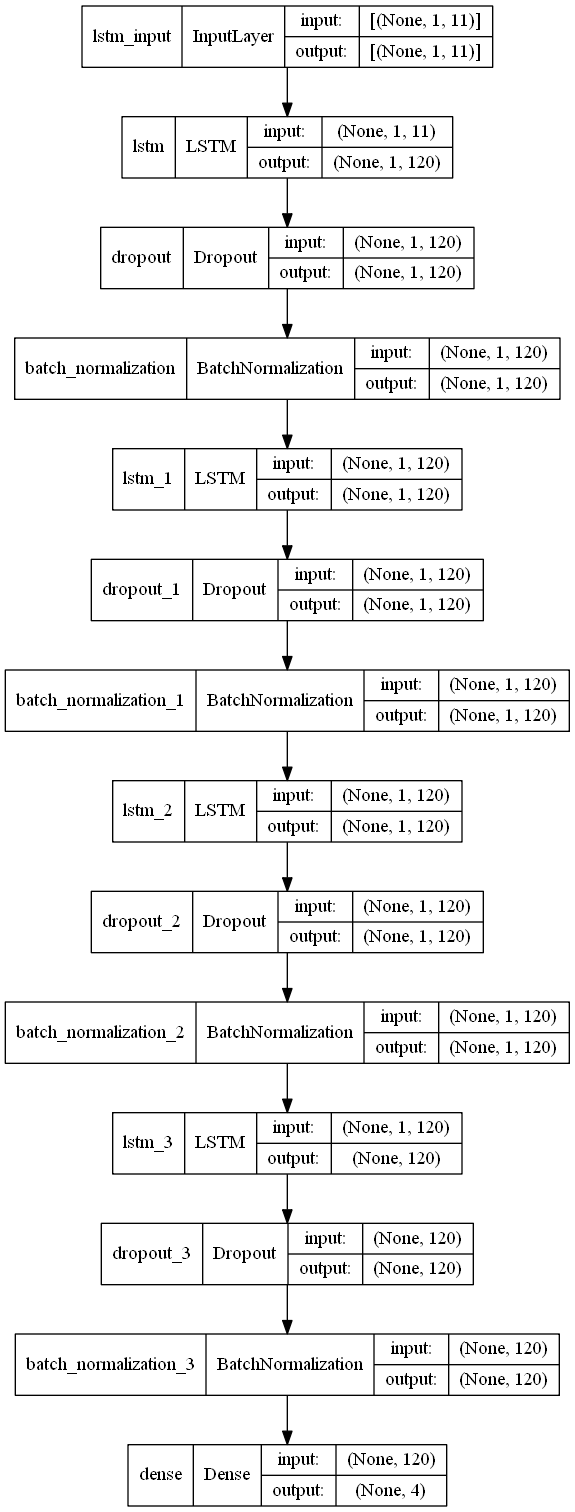

In [62]:
plot_model(model, to_file='IMIS.png', show_shapes=True, show_layer_names=True)

In [63]:
cp = tf.keras.callbacks.ModelCheckpoint(filepath="1IMIS.h5",
                               mode='min', monitor='val_loss', verbose=0, save_best_only=True)
# define our early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1, 
    mode='min',
    restore_best_weights=True)

In [ ]:
#Model Runnig
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=128,
                    shuffle=True,
                    validation_data=(X_test, y_test),
                    verbose=1,
                    callbacks=[cp, early_stop]
                    ).history

Epoch 1/5
5196/5196 [==============================] - 80s 14ms/step - loss: 0.1085 - accuracy: 0.9649 - val_loss: 0.0495 - val_accuracy: 0.9867
Epoch 2/5
5196/5196 [==============================] - 74s 14ms/step - loss: 0.0572 - accuracy: 0.9840 - val_loss: 0.0408 - val_accuracy: 0.9904
Epoch 3/5
5196/5196 [==============================] - 73s 14ms/step - loss: 0.0491 - accuracy: 0.9873 - val_loss: 0.0367 - val_accuracy: 0.9914
Epoch 4/5
5196/5196 [==============================] - 73s 14ms/step - loss: 0.0454 - accuracy: 0.9890 - val_loss: 0.0348 - val_accuracy: 0.9926
Epoch 5/5
 513/5196 [=>............................] - ETA: 1:05 - loss: 0.0470 - accuracy: 0.9888

KeyError: 'loss'

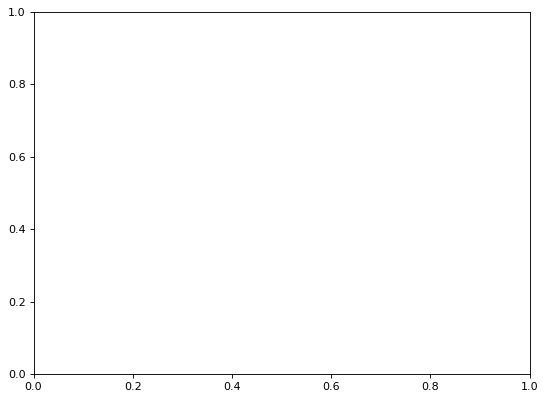

In [95]:
# plot the training losses
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)
ax.plot(model.history.history['loss'], 'b', label='Train', linewidth=2)
ax.plot(model.history.history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

In [96]:
#Prediction
pred = model.predict(X_test)
#obj = scaler.fit(y_pred)
#predicted = obj.inverse_transform(y_pred)

In [61]:
from sklearn.metrics import confusion_matrix

y_pred = np.argmax(pred, axis=1)
# label
y_test = np.argmax(y_test, axis=1)
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[11320     0     0     0]
 [    0 11748     0     0]
 [    5     0  9374     2]
 [  260     0     1  2290]]


In [62]:
from sklearn.metrics import classification_report
class_names = ["Normal", "Fuzz", "DoS", "Replay"]
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

      Normal       0.98      1.00      0.99     11320
        Fuzz       1.00      1.00      1.00     11748
         DoS       1.00      1.00      1.00      9381
      Replay       1.00      0.90      0.95      2551

    accuracy                           0.99     35000
   macro avg       0.99      0.97      0.98     35000
weighted avg       0.99      0.99      0.99     35000

